The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of chicago's Billing Hospital on the survival of patients who had undergone surgery for brest cancer.

we have 3 features and 1 class label

1) Age- Age of the patient at the time of operation

2) Year- Year in which patieents had an operation in 90's. if 64 is written it means 1964

3) Nodes- Number of positive Axillary nodes detected. These are known as "Axillary lymph nodes" whose function is to filter fluids before they are enentually released into the bloodstream having a cancer cells in nodes tell us that the cancer might have spread to other body parts also.

4) Survival Status- This is a target variable, having two values 1 and 2. 1 indicates: The patients survived 5 years or longer post operatipon. 2 indicates: The patients died with 5 years

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_csv("/content/haberman - haberman.csv")

In [ ]:
df.columns = ["Age", "Year", "Nodes", "Survival"]

In [ ]:
df.head()

,Age,Year,Nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


**AGENDA:** Given a patient with some age, Year of Operation and number of lymph nodes detected, we have to predict or conclude the chances whether the patients will live less than 5 or more thsn 5 years.

In [ ]:
df.shape

(305, 4)

In [ ]:
df.isnull().sum()

Age         0
Year        0
Nodes       0
Survival    0
dtype: int64

In [ ]:
df.duplicated().value_counts()

False    288
True      17
dtype: int64

We will remove duplicates, as these can be a genuine possibility

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Age       305 non-null    int64
 1   Year      305 non-null    int64
 2   Nodes     305 non-null    int64
 3   Survival  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [ ]:
df.Survival.value_counts()

1    224
2     81
Name: Survival, dtype: int64

In [ ]:
df = df.replace([1,2],[0,1])

In [ ]:
df.Survival.value_counts()

0    224
1     81
Name: Survival, dtype: int64

In [ ]:
df.describe()

,Age,Year,Nodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [ ]:
# Min(Age)= 30, Max(Age) = 83, Year[1958,1969], Nodes = [0,52], Survival = [0,1]
# Nodes have higher count density between 0 and 4(75% percentile)

**UNIVARIATE ANALYSIS**

Survival

In [ ]:
df.Survival.value_counts()

0    224
1     81
Name: Survival, dtype: int64

In [ ]:
df.Survival.value_counts(1)

0    0.734426
1    0.265574
Name: Survival, dtype: float64

<Axes: xlabel='Survival', ylabel='count'>

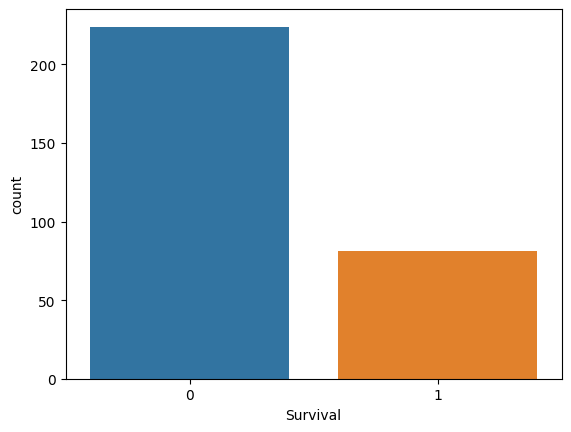

In [ ]:
sns.countplot(x = "Survival", data = df)

Age

In [ ]:
df.Age.describe()

count    305.000000
mean      52.531148
std       10.744024
min       30.000000
25%       44.000000
50%       52.000000
75%       61.000000
max       83.000000
Name: Age, dtype: float64

0.15898611605406873


<Axes: xlabel='Age', ylabel='Count'>

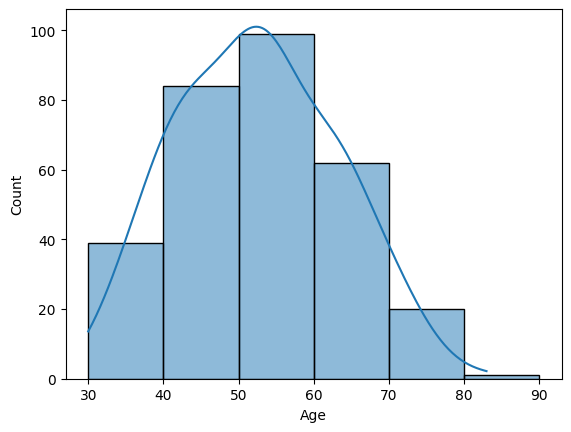

In [ ]:
print(df.Age.skew())

sns.histplot(x = "Age", data = df, binwidth= 10, kde = True)
# The maximum people had operation in the age group of 50-60


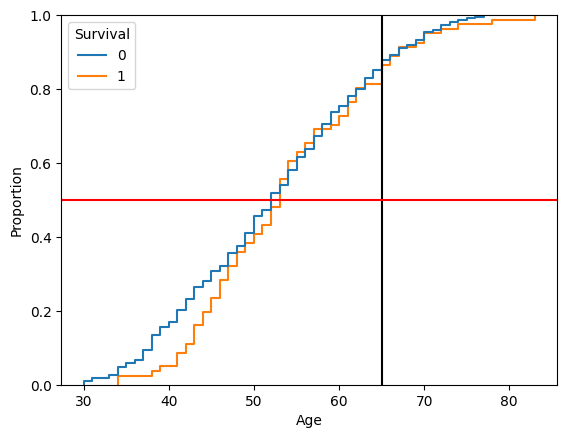

In [ ]:
sns.ecdfplot(x = "Age", data = df, hue = "Survival")
plt.axvline(65, c= "black")
plt.axhline(0.5, c  = "red")

#50% of people were 65 years old


Operation Year

<Axes: >

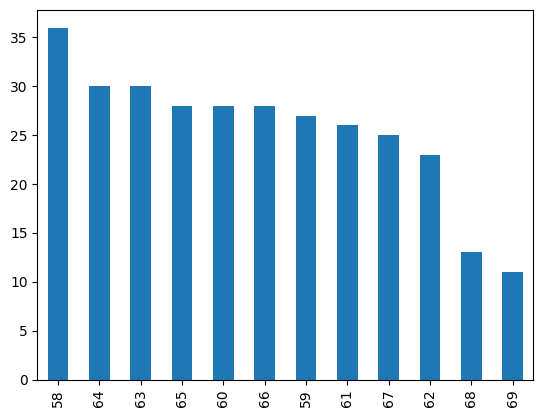

In [ ]:
df.Year.value_counts().plot(kind = "bar")

Lymph Nodes

In [ ]:
df.Nodes.describe()

count    305.000000
mean       3.839344
std        7.283978
min        0.000000
25%        0.000000
50%        0.000000
75%        4.000000
max       52.000000
Name: Nodes, dtype: float64

<Axes: >

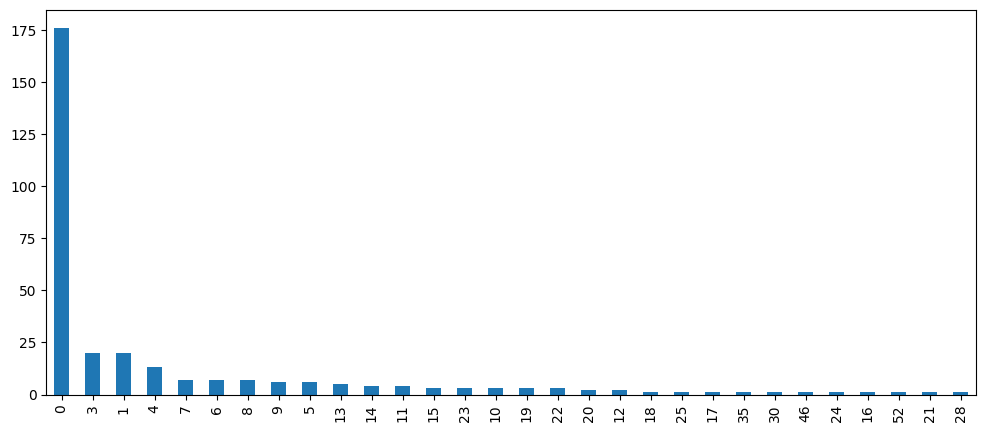

In [ ]:
plt.figure(figsize=(12,5))
df.Nodes.value_counts().plot(kind = "bar")

2.940405369162834


<Axes: xlabel='Nodes', ylabel='Count'>

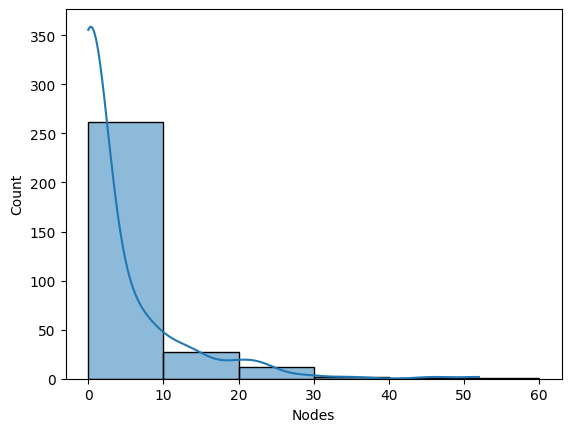

In [ ]:
print(df.Nodes.skew())

sns.histplot(x = "Nodes", data = df, binwidth= 10, kde = True)
# Maximum Density counts for Nodes is between 0 and 10

**BIVARIATE ANALYSI**S

 ** Task:** Age-Survival,   Node-Survival,   Year-Survival,   Age-Nodes,    
  Year-Nodes,   Age-Years

<Axes: xlabel='Survival', ylabel='Age'>

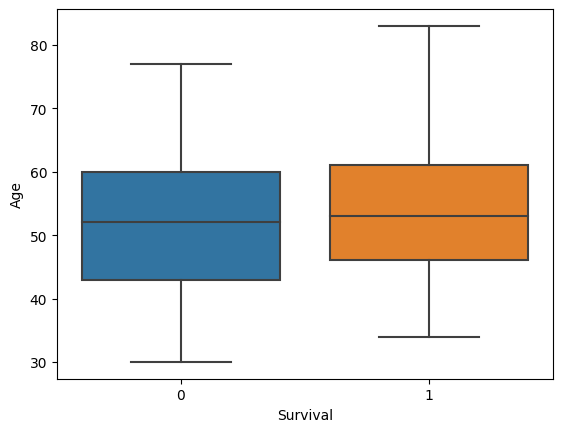

In [ ]:
sns.boxplot(x="Survival", y = "Age", data= df)
# People with age > 77 will live lessar than 5 years
# People with age<35 will actually live more than 5 years

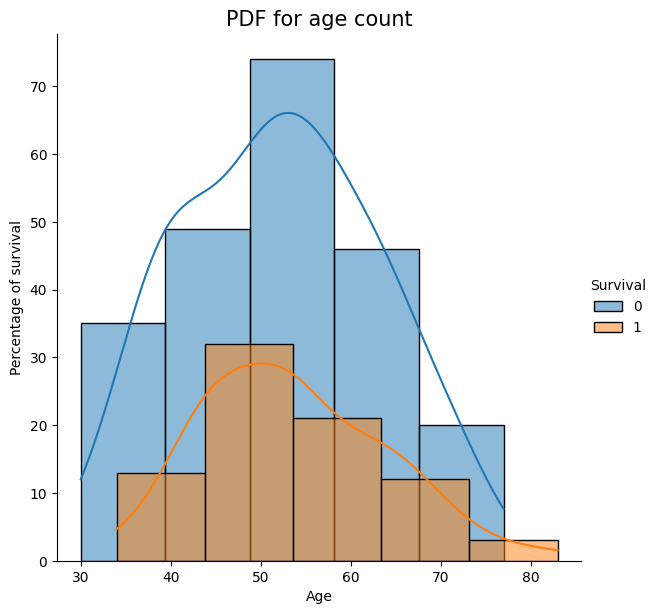

In [ ]:
sns.FacetGrid(df, hue = "Survival", height = 6).map(sns.histplot, "Age", bins = 5, kde = True).add_legend()
plt.xlabel("Age")
plt.ylabel("Percentage of survival")
plt.title("PDF for age count", size = 15)
plt.show()
# Maximum % of people living lessar than 5 years are between 45 to 55
# People between 30-33(approx) years old are living more than 5 years
# People with age > 77 will live lessar than 5 years

In [ ]:
df.groupby("Age")["Survival"].sum().sort_values(ascending = False)

Age
53    6
46    4
43    4
65    4
54    4
52    4
47    3
61    3
45    3
44    3
48    3
41    3
57    3
62    3
50    2
49    2
56    2
51    2
55    2
42    2
66    2
67    2
70    2
34    2
60    2
69    1
72    1
74    1
63    1
78    1
83    1
59    1
39    1
38    1
36    0
33    0
77    0
76    0
75    0
35    0
73    0
71    0
58    0
37    0
68    0
40    0
31    0
64    0
30    0
Name: Survival, dtype: int64

In [ ]:
df.Age.value_counts().sort_values(ascending = False)

52    14
54    13
50    12
57    11
53    11
47    11
43    11
65    10
38    10
49    10
41    10
55    10
42     9
45     9
61     9
63     8
59     8
70     7
46     7
48     7
44     7
34     7
62     7
56     7
58     7
37     6
51     6
60     6
39     6
67     6
66     5
64     5
72     4
69     4
40     3
31     2
33     2
35     2
36     2
73     2
68     2
30     2
74     2
71     1
75     1
76     1
77     1
78     1
83     1
Name: Age, dtype: int64

<Figure size 1200x600 with 0 Axes>

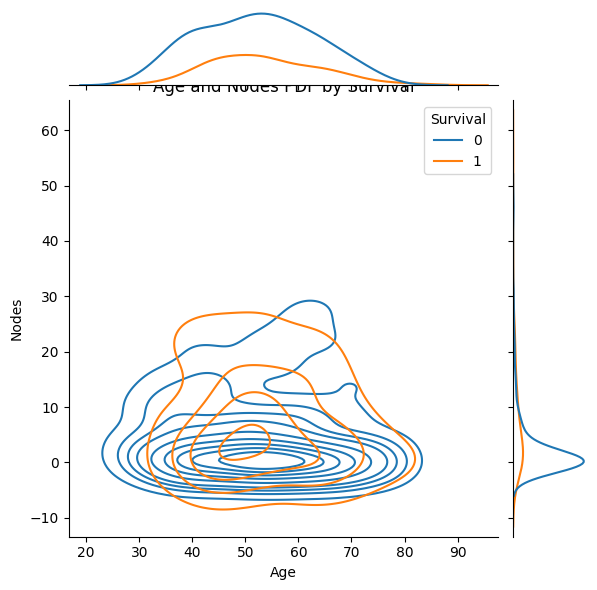

In [ ]:
plt.figure(figsize=(12,6))
sns.jointplot(x = "Age", y = "Nodes", data = df, hue = "Survival", kind = "kde")
plt.title("Age and Nodes PDF by Survival")
plt.show()

#  Age[43-53] and Nodes [10-52] will live lessor than 5 years

<Axes: xlabel='Survival', ylabel='Nodes'>

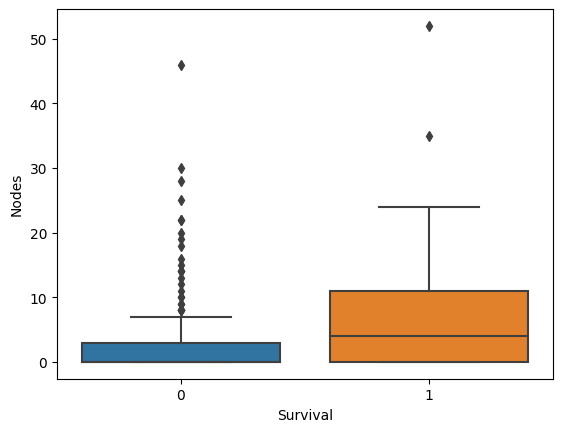

In [ ]:
sns.boxplot(x="Survival", y = "Nodes", data= df)

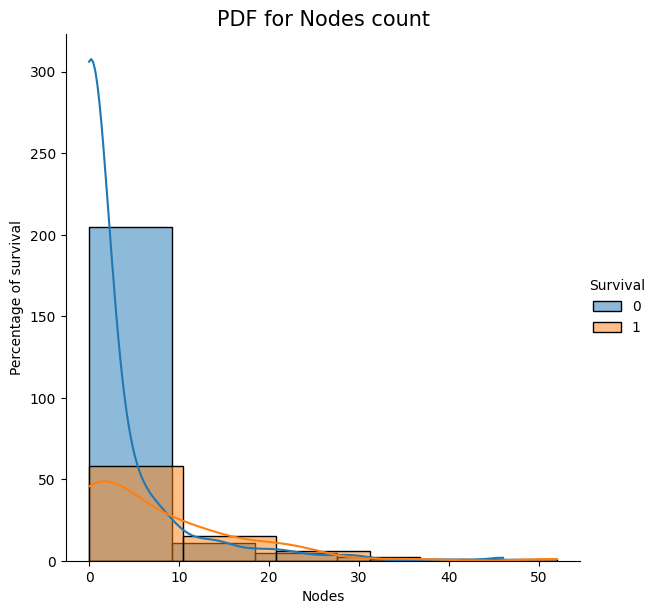

In [ ]:
sns.FacetGrid(df, hue = "Survival", height = 6).map(sns.histplot, "Nodes", bins = 5, kde = True).add_legend()
plt.xlabel("Nodes")
plt.ylabel("Percentage of survival")
plt.title("PDF for Nodes count", size = 15)
plt.show()

In [ ]:
df.groupby("Nodes")["Survival"].sum().sort_values(ascending=False)

Nodes
0     27
3      7
1      5
13     4
5      4
9      4
4      3
6      3
23     3
11     3
15     2
19     2
8      2
7      2
24     1
20     1
22     1
21     1
35     1
52     1
17     1
14     1
12     1
10     1
18     0
25     0
28     0
30     0
46     0
16     0
Name: Survival, dtype: int64

In [ ]:
df.Nodes.value_counts().sort_values(ascending = False)

0     176
1      20
3      20
4      13
7       7
6       7
8       7
9       6
5       6
13      5
14      4
11      4
10      3
22      3
19      3
23      3
15      3
20      2
12      2
18      1
25      1
17      1
35      1
30      1
46      1
24      1
16      1
52      1
21      1
28      1
Name: Nodes, dtype: int64

Nodes- Percent of chances they will die lesser than 5:


0-15%,  1-25%,  3-35%,  4-23%, 5-67%, 6-43%, 7-29%, 8-29%, 9-67%, 10-33%, 13-80%, 23-100%

as you can se above 10 Nodes there high percent of die

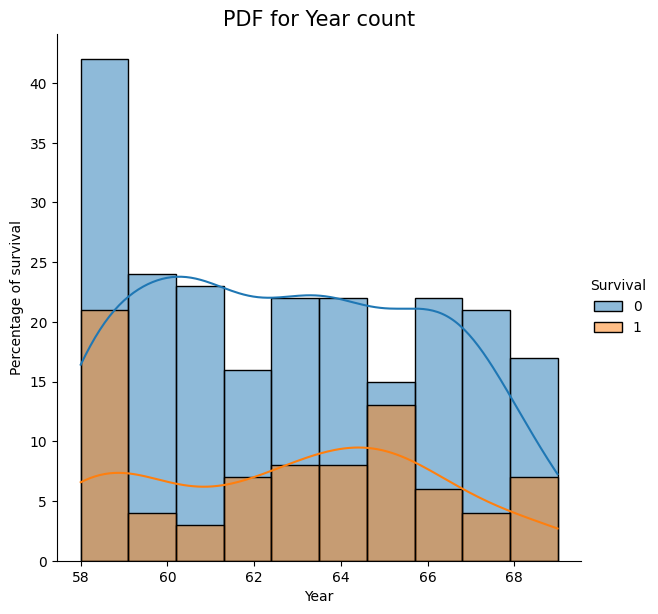

In [ ]:
sns.FacetGrid(df, hue = "Survival", height = 6).map(sns.histplot, "Year", bins = 10, kde = True).add_legend()
plt.xlabel("Year")
plt.ylabel("Percentage of survival")
plt.title("PDF for Year count", size = 15)
plt.show()

In [ ]:
df.groupby("Survival")["Year"].value_counts().unstack()



Year,58,59,60,61,62,63,64,65,66,67,68,69
Survival,,,,,,,,,,,,
0,24,18,24,23,16,22,22,15,22,21,10,7
1,12,9,4,3,7,8,8,13,6,4,3,4


# 1965- 46% died
# 1958- 33%, # 1959- 45%

# 33% people died before 5 years when operated between 1965,66

<Figure size 1200x600 with 0 Axes>

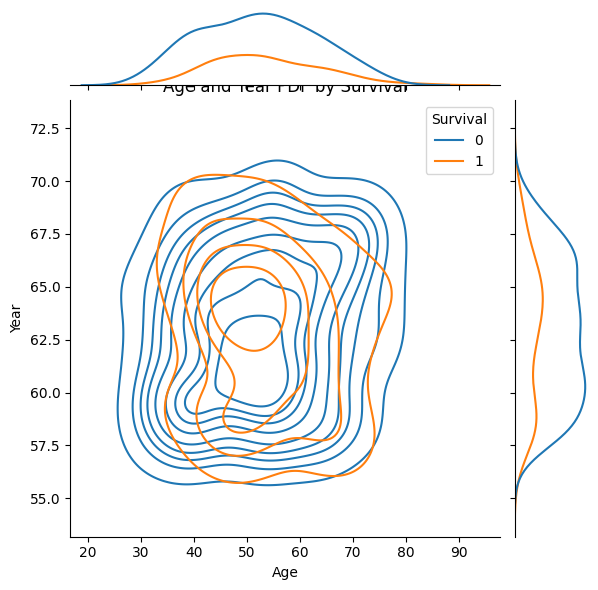

In [ ]:
plt.figure(figsize=(12,6))
sns.jointplot(x = "Age", y = "Year", data = df, hue = "Survival", kind = "kde")
plt.title("Age and Year PDF by Survival")
plt.show()

**MULTIVARIATE ANALYSIS**

<Axes: >

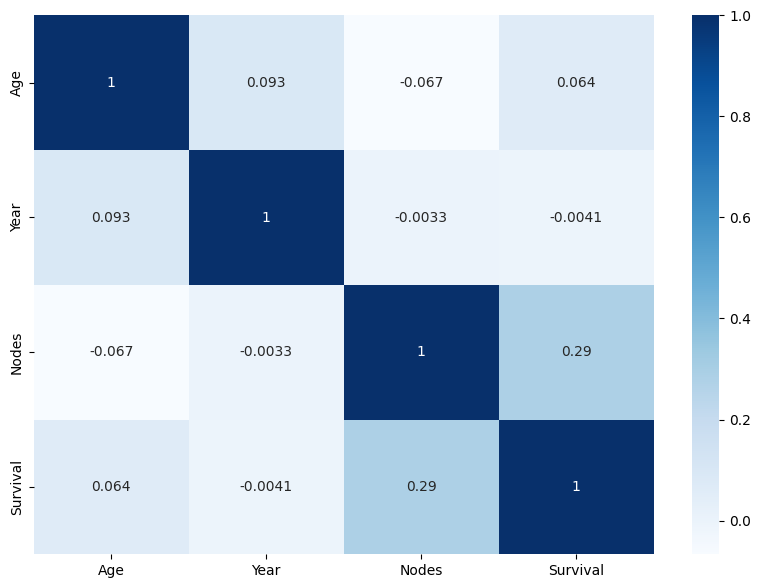

In [ ]:
plt.figure(figsize = (10,7))
corr = df.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns,cmap = "Blues", annot = True)

Nodes and Survival are corelated by 29%